# Multimodal deep learning using PyTorch
## SIIM Github Repo
### Task

Train a multi modal deep learning model to classify MGMT promoter methylation status using different MRI sequences and age.

Requirements
Basic understanding of machine learning and deep learning
Programming in Python
Programming in PyTorch
Learning objectives
At the end of this activity, you will be able to:

- Define multimodality and state its importance
- Categorize different types of multimodality
- Implement Imaging-Imaging multimodality deep leaning in PyTorch
- Implement Imaging-Non imaging multimodality deep leaning in PyTorch
- Implement multimodal deep leaning with result ensemble in PyTorch

Acknowledgements
This Jupyter Notebook was based on code by Shahriar Faghani, MD (Faghani.shahriar@mayo.edu), Gian Marco Conte, MD, PhD (Gianmarco.conte@mayo.edu) and, Mana Moassefi, MD (Moassefi.mana@mayo.edu) developed at Artificial intelligence lab, Mayo Clinic, Rochester

### **Graded items in this notebook are identified with the "TODO [Graded]" message.**

# TODO: install gdown and restart runtime

We will be using quite a large data set this week. We will get the donwload started before reading on. This will be similar to the CNN classification lab two weeks ago and we first need to install gdown.

Run the cell below. Then depending on whether you are running this in a jupyter notebook or on Google Colab follow these instructions:

**Jupyter** - click on the 'Kernel' tab at the top of the notebook and choose 'Restart & Clear Output'. Rerun all the cells from the start of the notebook to this point before moving on.

**Colab** - click on the 'Runtime' tab at the top of the notebook and choose 'Restart Runtime'. Rerun all the cells from the start of the notebook to this point before moving on.These steps ensure that the installation takes effect. We will use gdown to download the data set shortly.

In [1]:
 !pip install -U --no-cache-dir gdown --pre #TODO: run this cell and follow the instructions in the cell above.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [2]:
import os
import gdown

gdown.download('https://drive.google.com/uc?id=1HP6B4XjGEUJnJC2hVxruBGgYqmABxyWV', 'train_labels.csv', quiet=False)
gdown.download('https://drive.google.com/uc?id=118hQ1pmtx_NftIFs57ScnEPtpHeSxnr3', 'data.zip', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1HP6B4XjGEUJnJC2hVxruBGgYqmABxyWV
To: /content/train_labels.csv
100%|██████████| 4.70k/4.70k [00:00<00:00, 7.46MB/s]
Downloading...
From: https://drive.google.com/uc?id=118hQ1pmtx_NftIFs57ScnEPtpHeSxnr3
To: /content/data.zip
100%|██████████| 2.72G/2.72G [00:44<00:00, 60.5MB/s]


'data.zip'

In [3]:
!unzip data.zip # if running on colab run this line of code.

# !unzip data.zip -d ./data/ # if running on a local jupyter notebook uncomment and run this line instead.

Archive:  data.zip
   creating: data/
   creating: data/00203/
  inflating: __MACOSX/data/._00203   
   creating: data/00204/
  inflating: __MACOSX/data/._00204   
   creating: data/00098/
   creating: data/00062/
   creating: data/00096/
   creating: data/00008/
   creating: data/00090/
   creating: data/00097/
   creating: data/00063/
   creating: data/00099/
   creating: data/00111/
  inflating: __MACOSX/data/._00111   
   creating: data/00116/
  inflating: __MACOSX/data/._00116   
   creating: data/00142/
  inflating: __MACOSX/data/._00142   
   creating: data/00187/
  inflating: __MACOSX/data/._00187   
   creating: data/00128/
  inflating: __MACOSX/data/._00128   
   creating: data/00117/
  inflating: __MACOSX/data/._00117   
   creating: data/00110/
  inflating: __MACOSX/data/._00110   
   creating: data/00121/
  inflating: __MACOSX/data/._00121   
   creating: data/00186/
  inflating: __MACOSX/data/._00186   
   creating: data/00172/
  inflating: __MACOSX/data/._00172   
   cre

#### Similar to human physicians, automated detection and classification systems that use both medical imaging data and clinical data from the EHR -- such as patient demographics, previous diagnoses, and laboratory data -- are likely to produce models with better performance. Recent medical imaging literature also shows a similar trend where both EHR and pixel data are exploited in a "fusion paradigm" for solving complex tasks that cannot easily be solved by one modality alone (Huang et al. 2020).

### Imaging models:

#### Contemporary medicine relies on the synthesis of a wide variety of information such as imaging data, laboratory data, unstructured narrative data, 1D signals like EKG, and in some cases, audio or observational data. The clinical context of images often plays a critical role in providing diagnosis decisions in medical image interpretation. For example, it has repeatedly been shown that a lack of access to clinical and laboratory data during image interpretation results in lower performance and decreased clinical utility for the referring provider. In a survey of radiologists, the majority (87%) stated that clinical information had a significant impact on interpretation (Boonn and Langlotz 2009). Radiology is not the only imaging-based medical specialty that relies on context for accurate interpretation of imaging data; pathology, ophthalmology, and dermatology also use clinical context for clinical image interpretation. With accurate and relevant information regarding current symptoms and past medical history, physicians are better able to interpret imaging findings in the appropriate clinical context, resulting in a more relevant differential diagnosis, a more useful report for physicians, and a more favorable outcome for the patient. 
#### Convolutional neural network (CNN) models typically use pixel values as inputs, without contextualizing other clinical information as doctors do in clinical practice, which may limit performance. As an example consider the “simple” task in radiology of identifying pneumonia on a chest x-ray (CXR), something that has been achieved by many investigators training deep learning models for automated detection and classification of pathologies. Such applications, however, may ultimately have a limited impact on clinical practice without clinical context such as chief complaint, history of present illness, past medical history, drug history, family history, physical examination findings, and laboratory values. In spite of having imaging findings that can set pneumonia apart from other diagnoses, CXR is nonspecific, and accurate diagnosis requires clinical and laboratory information. CXR findings that suggest pneumonia would be accurate in patients with fevers and elevated white blood cell counts, but in patients with no similar clinical features or laboratory values, similar images might indicate atelectasis, pulmonary edema, interstitial disease, or even lung cancer. 

#### First, we will discuss different fusion techniques in deep learning and machine learning, and then we will discuss some medical multimodality examples, and finally, we will develop a simple multimodal model.


### Fusion Techniques

#### Image fusion is a technique for combining the information from several imaging data sources acquired from the same or different modalities. A goal of image fusion, especially in medical imaging, is to enhance or complement each data source's features, so that machine learning algorithms can achieve better performance rather than using only one data channel. The expected output will have a richer feature representation than the individual components. The multimodal fusion technique has achieved remarkable success in a variety of applications like medical image segmentation, image classification, and image reconstruction.
#### Data fusion requires more than one data source (e.g. could be from one exam like T1 and T2 of MRI or different exams like MRI and CT). The traditional image processing literature refers to these as ‘channels’ and we will also use that nomenclature. Data channels can be heterogeneous, complementary, concordant or discordant, synchronous or asynchronous, and redundant with different scales that must be normalized in order to be combined. Medical images such as MRI/CT/PET/Ultrasound also have differences that must be considered when using them in combination. Therefore, the choice of algorithm or architecture depends primarily on the goal of the application and data channel characteristics. To summarize, the advantages of data fusion (Bellot et al. 2002) are:
#### 1) To provide different types of information to help increase certainty about the diagnosis.
#### 2) To combine source features and extract the new or hidden information with increased certainty.
#### 3) To enhance the abstraction and completeness of data by efficiently combining them.
#### In recent computer vision publications, people investigate the multimodal fusion strategies in the context of the spatio-temporal convolutional neural network (Karpathy et al. 2014) and broadly categorized into four fusion patterns/classes: Early fusion, Late fusion, Joint fusion, and Slow fusion.    	


### Early Fusion:

#### Early fusion merges the various data channels at the beginning of the machine learning model training. These individual modality features may be joined in different ways, such as by average pooling, weighted concatenation, or gated fusion techniques (Type I or II in Fig. 1). The unimodal local features are concatenated into a joint representation. Therefore, the unified model must ensure that the data/features are correctly aligned in order to enable joint processing. As a result, converting data sources into a single feature vector is a significant challenge in early data fusion approaches. In reality, the conditionally independent criteria between medical data sources are not always true as multiple modalities may have highly correlated features, possibly because of acquisition setting. Therefore, different data collection modalities are typically spatially aligned (known as image registration) with a standard pixel sampling rate (for images or perhaps time for other modalities) to make a common ground for fusion. If the data is aligned correctly, the cross-correlations between data items may be exploited, which provides an opportunity to increase the system performance (Gadzicki et al. 2020).


<img src="https://i.ibb.co/WchcPN1/fig1.png"><br>
*Figure 1.* **Early Fusion**<br><br>


### Late or Ensemble Fusion:
#### In late fusion, the individual streams fully process each data channel separately and their outputs are merged at a decision-making or prediction stage through a summation, averaging operation, or majority voting. Similar to the ensemble technique, the late fusion process learns the optimal combination of each component that maximizes performance. The learning process handles the errors independently, decorrelates errors, and thus improves performance with respect to each modality. The major drawback lies in the limited potential for the exploitation of cross-correlations between the different unimodal data.
<img src="https://i.ibb.co/T2JHW4X/fig2.png"><br>
*Figure 2.* **Late Fusion** <br><br>
### Intermediate/Joint Fusion
#### Joint fusion was introduced to fuse the imaging feature representations with the clinical features before feeding them into the model. Because of the differences between the imaging and clinical features in dimensionality and dynamic range, different models were introduced (Haylat 2020) to scale their clinical features before fusion and improve their performance (Fig. 3).
<img src="https://i.ibb.co/kKxVYfz/fig3.png"><br>
*Figure 3.* **Joint Fusion, Type I (Up) and Type II (down)** <br><br>
### Slow Fusion
#### Slow fusion is widely used in 3D video both the spatial and temporal dimensions (Huang et al. 2020) begin as multiple networks that take consecutive video frames and slowly fuse their temporal features throughout the network such that the higher layers progressively get access to global information(Karpathy et al. 2014). As shown in Fig. 4, the whole architecture is segregated into four layers of actions that progressively share the training parameters. In the first layer, each model takes four temporal sequences (stride of four) that pass through a series of convolutions, producing four feature maps. The second layer processes a series of two temporal features out of four feature maps and passes it to layer three, consequently accessing information across all the input video frames. Finally, layer four performs a pooling operation for global feature extraction and eventually connects higher tasks (classification) with a dense connection. Therefore, the machine learning or CNN models benefit from learning the powerful features with subsequent fusion connections and can be robust to details of the connectivity across time.
<img src="https://i.ibb.co/St6Ccz9/fig4.png"><br>



### Imaging Only Multimodal Learning:

#### As we discussed before, multimodality can be derived from a variety of sources; this section discusses image-image learning.

#### Multimodal imaging studies usually require co-registration. The process of co-registering images includes geometrically aligning two or more images so that their corresponding pixels (voxels) represent the same object. In general, image co-registration can be classified into two categories based on the reference: one approach registers the images into an existing atlas; the other approach registers the images into one selected image. It is essential that this process is undertaken before any subsequent quantitative image analysis. Various techniques are available for doing image registration, including DL-based registration and traditional registration, which are beyond the scope of this chapter (for further reading see (Haskins, Kruger, and Yan 2020)). 
#### Multimodal imaging has many real-world examples, one of which is the fusion of structural and functional (molecular) imaging such as PET-CT and PET-MR. Since molecular imaging has a limited spatial resolution, it cannot precisely show the location of tumors, and tracers often are not taken up by enough structures to make anatomic location clear. By acquiring CT or MR images within the same physical device, the precise anatomic location can be determined(Fig. 5).
<img src="https://i.ibb.co/vZf4V1b/fig5.png"><br>
*Figure 5.* **(a) Coregistered PET-CT scan , (b) CT scan,(c) PET scan**<br><br>
#### CT-MRI fusion for radiation therapy is another example. MRI has superb soft-tissue resolution and can show tumor which is difficult to appreciate on CT. On the other hand, MRI does not reflect radiation attenuation, which is critical to accurate dose delivery. As a result,fusion of MRI images with CT is commonly used in radiosurgery, interventional radiology, and radiotherapy. (Liu et al. 2019) (Fig. 6)
<img src="https://i.ibb.co/qjyf2Z6/fig6.png"><br>
*Figure 6.* **(a) CT scan, (b) Coregistered CT-MRI scan,(c) MRI scan**<br><br>
#### While we used different modalities in the above examples, there are also times when planes or modes of acquisition of the same modality can yield different types of information that can be utilized. For instance, using both the mediolateral oblique (MLO) and the craniocaudal (CC) mammogram views increases the accuracy of diagnostic imaging for detecting breast cancers, compared to only using one. (Fig. 7)


#### In this notebook we are going to train a model to determine MGMT promoter methylation status within patients with GBM tumor.
##### We are going to use T1,T2,T1 post contrast,FLAIR MRI sequences and also mask of tumor.

### Import Packages

In [4]:
!pip install monai -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 59.5 MB/s eta 0:00:00


In [31]:
import os
import math
import torch
import shutil
import random
import requests
import monai as mn
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

def sub_model(team, hyperparam):
  url='https://aihc5010.pythonanywhere.com/submit-model/'
  hyperparam['team']=team
  hyperparam['ModelKey']='lab3'
  x=requests.post(url,data=hyperparam)
  if x.status_code==200:
      print(f"Model Submitted Successfully for team {team}")
  else:
      print(x.status_code)
      print(x.text)
      print("Failed to Submit")

##TODO: Make sure you are using a GPU if there are any

If you are the cell below should print :

cuda:0

Otherwise it will print:

cpu

and training will run much more slowly

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


### Make Training Proccess Deterministic

In [7]:
def seed_all(seed:int) -> None:
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    mn.utils.misc.set_determinism(seed=seed)
seed_all(123)

In [8]:
# Enter your Team Name below
team = 'tester'# TODO: choose a team name

In [9]:
print("Your Team Name is:", team)

Your Team Name is: tester


# 1. Early Fusion

## This section contains 3 graded TODO items.

### Load Labels(MGMT methylation status) for each patient

In [10]:
dir_list = os.listdir('./data')

In [11]:
df=pd.read_csv('./train_labels.csv')# csv path
df.head(3)

,BraTS21ID,MGMT_value
0,0,1
1,2,1
2,3,0


The original BraTS21 data set is too large for the purposes of this lab. We will therefore work with a subset. Here we extract the labels for this subset from the train_labels.csv we read in in the previous cell.

In [12]:
subset = []
for d in dir_list:
    subset.append(df.loc[df['BraTS21ID'] == int(d.lstrip('0'))].values[0])
df = pd.DataFrame(subset, columns=['BraTS21ID', 'MGMT_value'])

### Splitting dataset to train and validation sets at patients level.

In [13]:
df_train,df_val=train_test_split(df, test_size=0.2, train_size=0.8, random_state=123, shuffle=True, stratify=df['MGMT_value'])

In [14]:
print('Number of positive train samples:',len(df_train[df_train['MGMT_value']==1]))
print('Number of negative train samples:',len(df_train[df_train['MGMT_value']==0]))
print('Number of positive validation samples:',len(df_val[df_val['MGMT_value']==1]))
print('Number of negative validation samples:',len(df_val[df_val['MGMT_value']==0]))
print('Ratio of positive to negative samples in train set:',len(df_train[df_train['MGMT_value']==1])/len(df_train[df_train['MGMT_value']==0]))
print('Ratio of positive to negative samples in validation set:',len(df_val[df_val['MGMT_value']==1])/len(df_val[df_val['MGMT_value']==0]))

Number of positive train samples: 38
Number of negative train samples: 38
Number of positive validation samples: 10
Number of negative validation samples: 10
Ratio of positive to negative samples in train set: 1.0
Ratio of positive to negative samples in validation set: 1.0


Number of Total positive samples:48
Number of Total Negative samples:48


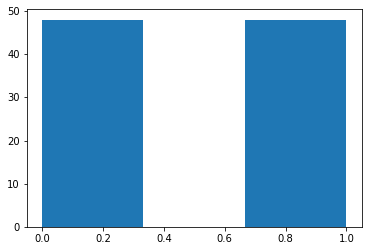

In [15]:
df['MGMT_value'].hist(grid=False,bins=3)
len_neg=len(df[df['MGMT_value']==0])
len_pos=len(df[df['MGMT_value']==1])
print(f'Number of Total positive samples:{len_pos}\nNumber of Total Negative samples:{len_neg}')

### Retrieve image paths

In [16]:
def path_maker_list(patient_list:list,path:str):
    path_list=[]
    for item in patient_list:
        path_patient=os.path.join(path,item)
        path_list.append(path_patient)
    return path_list

In [17]:
path_list = path_maker_list(dir_list,'./data')
print(len(path_list))
print(path_list)

96
['./data/00134', './data/00144', './data/00095', './data/00097', './data/00123', './data/00212', './data/00008', './data/00199', './data/00122', './data/00156', './data/00201', './data/00085', './data/00032', './data/00160', './data/00121', './data/00056', './data/00155', './data/00130', './data/00139', './data/00172', './data/00196', './data/00184', './data/00128', './data/00046', './data/00185', './data/00138', './data/00171', './data/00081', './data/00024', './data/00170', './data/00033', './data/00186', './data/00193', './data/00104', './data/00072', './data/00071', './data/00191', './data/00109', './data/00146', './data/00166', './data/00124', './data/00112', './data/00099', './data/00113', './data/00157', './data/00206', './data/00159', './data/00210', './data/00133', './data/00117', './data/00045', './data/00162', './data/00167', './data/00169', './data/00177', './data/00203', './data/00105', './data/00154', './data/00017', './data/00165', './data/00077', './data/00062', './d

In [18]:
path_list[0]

'./data/00134'

##### Create List of Dictionaries that for each patient contain: Paths of different MRI sequences and Label

In [19]:
train_list=[]
val_list=[]
for i,idx in enumerate(path_list):
    data_dict={}
    id_num=int(idx.split('/')[-1])
    df_selected=df.loc[lambda df: df['BraTS21ID'] == id_num]
    idx_str=idx.split('/')[-1]
    try:
      label=list(df_selected['MGMT_value'])[0]
      data_dict['img_t1']=f'{idx}/{idx_str}_T1w.nii.gz'
      data_dict['img_t2']=f'{idx}/{idx_str}_T2w.nii.gz'
      data_dict['img_t1c']=f'{idx}/T1.nii.gz'
      data_dict['img_flair']=f'{idx}/{idx_str}_FLAIR.nii.gz'
      data_dict['seg']=f'{idx}/segmentation.nii.gz'
      data_dict['label']=label
    except:
      pass
    if id_num in list(df_train['BraTS21ID']):
        train_list.append(data_dict)
    elif id_num in list(df_val['BraTS21ID']):
        val_list.append(data_dict)
print(f'Number of train samples:{len(train_list)}')
print(f'Number of validation samples:{len(val_list)}')
print(f'Each dictionary would be like:\n{train_list[0]}')

Number of train samples:76
Number of validation samples:20
Each dictionary would be like:
{'img_t1': './data/00144/00144_T1w.nii.gz', 'img_t2': './data/00144/00144_T2w.nii.gz', 'img_t1c': './data/00144/T1.nii.gz', 'img_flair': './data/00144/00144_FLAIR.nii.gz', 'seg': './data/00144/segmentation.nii.gz', 'label': 1}


## TODO: select the image modalites you want to train with. Here we have started with the T1 post-contrast and T2 images.

In [20]:
mri_to_use=["img_t1c",'img_t2'] # TODO: You can experiment with changing the image modalities included here. You could also try using the tumor segmentation as an input.

##TODO: Transformations - you can read more on different transformations here:

https://pytorch.org/vision/stable/transforms.html

You can experiment with changing the parameters of the transformations included below or try adding additional transformations.

In [21]:
spatial_size = (128,128,64)
train_transforms=mn.transforms.Compose([
    mn.transforms.LoadImageD(keys=mri_to_use),
    mn.transforms.AddChannelD(keys=mri_to_use),
    mn.transforms.SpacingD(keys=mri_to_use,pixdim=(1,1,1), meta_key_postfix='meta_dict'),
    mn.transforms.Resized(keys=mri_to_use, spatial_size=spatial_size),

    ###QUESTION TIME!###  Complete the next function
    mn.transforms.NormalizeIntensityD(keys=mri_to_use,channel_wise=True),
    #channel_wise (bool) – if True, calculate on each channel separately, otherwise, calculate on the entire image directly. default to False.
    #''' https://docs.monai.io/en/stable/transforms.html#normalizeintensityd '''

    ###QUESTION TIME AGAIN!###  
    mn.transforms.ConcatItemsd(keys=mri_to_use, name="img"),
    #'''What would be the shape of ''img'' ? '''

    mn.transforms.RandAffineD(
        keys="img",
        translate_range=(15,15,10),
        scale_range=(0.05,0.05,0.05),
        rotate_range=(math.pi/12,math.pi/12,math.pi/15),
        padding_mode='zeros',
        prob=0.5),
    mn.transforms.ToTensord(keys=["img","label"]),
    
])

val_transforms=mn.transforms.Compose([
    mn.transforms.LoadImageD(keys=mri_to_use),
    mn.transforms.AddChannelD(keys=mri_to_use),
    mn.transforms.SpacingD(keys=mri_to_use,pixdim=(1,1,1), meta_key_postfix='meta_dict'),
    mn.transforms.Resized(keys=mri_to_use, spatial_size=spatial_size),

    ###QUESTION TIME! Last time :) ###  
    mn.transforms.NormalizeIntensityD(keys=mri_to_use,channel_wise=True),
    #channel_wise (bool) – if True, calculate on each channel separately, otherwise, calculate on the entire image directly. default to False.
    #''' https://docs.monai.io/en/stable/transforms.html#normalizeintensityd '''
  
    mn.transforms.ConcatItemsd(keys=mri_to_use, name="img"),
    mn.transforms.ToTensord(keys=["img","label"]),
    
])

/usr/local/lib/python3.8/dist-packages/monai/utils/deprecate_utils.py:107: FutureWarning: <class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead.
  warn_deprecated(obj, msg, warning_category)
/usr/local/lib/python3.8/dist-packages/monai/utils/deprecate_utils.py:219: FutureWarning: monai.transforms.spatial.dictionary Spacingd.__init__:meta_key_postfix: Argument `meta_key_postfix` has been deprecated since version 0.9.
  warn_deprecated(argname, msg, warning_category)


## TODO [Graded]: Why might we only include RandAffineD transformations for the training and not the validation set?

Answer in the cell below.

### Create Dataloader/Dataset/Sampler

In [22]:
'''Creating Dataset'''
train_ds = mn.data.Dataset(data=train_list, transform=train_transforms)
val_ds = mn.data.Dataset(data=val_list, transform=val_transforms)

In [23]:
for data in train_ds[:2]:
    print(data['img'].shape)

torch.Size([2, 128, 128, 64])
torch.Size([2, 128, 128, 64])


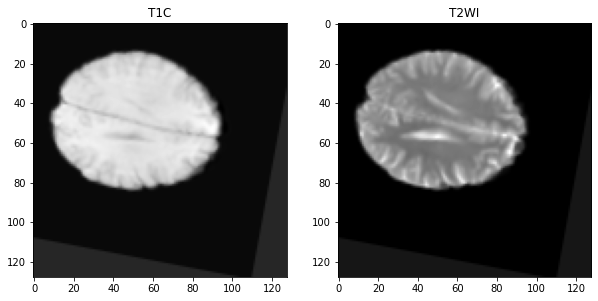

In [24]:
sample_img=train_ds[0]['img']
fig,axes=plt.subplots(1,2,figsize=(10,10));
axes[0].imshow(sample_img[0,:,:,32],cmap='gray');
axes[0].title.set_text('T1C')
axes[1].imshow(sample_img[1,:,:,32],cmap='gray');
axes[1].title.set_text('T2WI')

In [25]:
'''Sampler - this will take a few minutes'''
class_weights=[1,1]
sample_weights=[0]*len(train_ds)
for idx,data in enumerate(train_ds):
    class_weight=class_weights[data['label']]
    sample_weights[idx]=class_weight
sampler = WeightedRandomSampler(sample_weights,num_samples=len(sample_weights),replacement=True)

In [26]:
"""How make batch in dataloader"""
def collater(data):
    batch_imgs = [s['img'] for s in data]
    batch_labels = [s['label'] for s in data]
    imgs = torch.stack(batch_imgs, axis=0)
    targets = torch.stack(batch_labels, axis=0)
    targets=targets.squeeze(-1)
    return {'imgs': imgs, 'targets': targets}

### TODO: You can experiment with other hyperparameters in the cell below. We've included some suggestions to get you started. 

Again the data is large so during the lab session it is best to keep the epochs low as training will be slow. This will ensure you have time to get through the entire notebook. You can comeback and train for longer later.

In [27]:
# TODO: Hyperparameter selection
bs=2
lr=1e-5
epochs=3

In [28]:
"""Creating train and validation dataloader"""
train_loader = DataLoader(train_ds, batch_size=bs, num_workers=2, pin_memory=torch.cuda.is_available(),sampler=sampler,collate_fn=collater,prefetch_factor=1)
val_loader = DataLoader(val_ds, batch_size=bs, num_workers=2, pin_memory=torch.cuda.is_available(),collate_fn=collater,prefetch_factor=1)

### Create model

In [29]:
model = mn.networks.nets.DenseNet121(spatial_dims=3, in_channels=2, out_channels=2).to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr)

### Training and evaluation on Validation set



In [30]:
val_interval = 1
best_metric = -1
best_metric_epoch = -1

hyperparam = {
    'LearningRate': lr,
    'BatchSize': bs,
    'Epochs': epochs,
    'ImageSize': spatial_size[0]
}

for i,epoch in enumerate(tqdm(range(epochs))):
    print("-" * 10)
    print(f"epoch {epoch + 1}/{epochs}")
    model.train()
    epoch_loss = 0
    val_epoch_loss=0
    step = 0
    val_step=0
    for batch_data in tqdm(train_loader):
        step += 1
        inputs, labels = batch_data["imgs"].to(device), batch_data["targets"].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_len = (len(train_ds) // train_loader.batch_size)+1
        print(f"{step}/{epoch_len}, train_loss: {loss.item():.4f}")
    epoch_loss /= step
    print(f"epoch {epoch + 1} average loss: {epoch_loss:.4f}")

    
    model.eval()
    with torch.no_grad():
        y_pred = torch.tensor([], dtype=torch.float32, device=device)
        y = torch.tensor([], dtype=torch.long, device=device)
        for val_data in val_loader:
            val_step +=1
            val_images, val_labels = val_data["imgs"].to(device), val_data["targets"].to(device)
            val_output=model(val_images)
            val_loss= loss_function(val_output,val_labels)
            val_epoch_loss += val_loss.item()
            val_epoch_len = len(val_ds) // val_loader.batch_size
            total_val_step=(len(val_ds)//bs)+1
            print(f"{val_step}/{total_val_step}, val_loss: {val_loss.item():.4f}")
            y_pred = torch.cat([y_pred, model(val_images)], dim=0)
            y = torch.cat([y, val_labels], dim=0)
            

        val_epoch_loss /= val_step
        print(f"epoch {epoch + 1} average val_loss: {val_epoch_loss:.4f}")

        acc_value_val = torch.eq(y_pred.argmax(dim=1), y)
        acc_metric_val = acc_value_val.sum().item() / len(acc_value_val)
        if acc_metric_val > best_metric:
            best_metric = acc_metric_val
            best_metric_epoch = epoch + 1
            ##torch.save(model.state_dict(), "best_metric_model_classification3d_multimodal_early.pth") Specify Directory
            print("saved new best metric model")
        print(f"current epoch: {epoch + 1} current accuracy: {acc_metric_val:.4f} best accuracy: { best_metric:.4f}")
        print(f"loss: {loss}")
        print(f"\tAccuracy_val: {acc_metric_val}")
        y_pred = torch.tensor([], dtype=torch.float32, device=device)
        y = torch.tensor([], dtype=torch.long, device=device)
        
        step = 0
        train_step=0
        for train_data in train_loader:
            train_step +=1
            train_images, train_labels = train_data["imgs"].to(device), train_data["targets"].to(device)
            train_output=model(train_images)
            train_epoch_len = len(train_ds) // train_loader.batch_size
            total_train_step=(len(train_ds)//bs)+1
            y_pred = torch.cat([y_pred, model(train_images)], dim=0)
            y = torch.cat([y, train_labels], dim=0)
            

        acc_value_train = torch.eq(y_pred.argmax(dim=1), y)
        acc_metric_train = acc_value_train.sum().item() / len(acc_value_train)
        print('Accuracy_train :', acc_metric_train)

print(f"train completed, best_metric: {best_metric:.4f} at epoch: {best_metric_epoch}")

########################
### SUBMIT THE MODEL ###
########################

hyperparam['metric'] = best_metric
sub_model(team, hyperparam)

  0%|          | 0/3 [00:00<?, ?it/s]

----------
epoch 1/3


  0%|          | 0/38 [00:00<?, ?it/s]

1/39, train_loss: 0.5795
2/39, train_loss: 0.6430
3/39, train_loss: 0.7812
4/39, train_loss: 0.6851
5/39, train_loss: 0.5708
6/39, train_loss: 0.7125
7/39, train_loss: 0.8438
8/39, train_loss: 0.5606
9/39, train_loss: 0.5627
10/39, train_loss: 0.5544
11/39, train_loss: 0.5592
12/39, train_loss: 0.5584
13/39, train_loss: 0.7431
14/39, train_loss: 0.5450
15/39, train_loss: 0.8655
16/39, train_loss: 0.5442
17/39, train_loss: 0.5493
18/39, train_loss: 0.5421
19/39, train_loss: 0.5424
20/39, train_loss: 0.6870
21/39, train_loss: 0.6334
22/39, train_loss: 0.5286
23/39, train_loss: 0.6755
24/39, train_loss: 0.8702
25/39, train_loss: 0.5376
26/39, train_loss: 0.6883
27/39, train_loss: 0.6130
28/39, train_loss: 0.8164
29/39, train_loss: 0.7306
30/39, train_loss: 0.7451
31/39, train_loss: 0.9072
32/39, train_loss: 0.7130
33/39, train_loss: 0.8835
34/39, train_loss: 0.8996
35/39, train_loss: 0.8809
36/39, train_loss: 0.7289
37/39, train_loss: 0.5396
38/39, train_loss: 0.6801
epoch 1 average loss:

  0%|          | 0/38 [00:00<?, ?it/s]

1/39, train_loss: 0.7152
2/39, train_loss: 0.8748
3/39, train_loss: 0.7143
4/39, train_loss: 0.5406
5/39, train_loss: 0.8638
6/39, train_loss: 0.7437
7/39, train_loss: 0.6883
8/39, train_loss: 0.8665
9/39, train_loss: 0.7355
10/39, train_loss: 0.6836
11/39, train_loss: 0.8529
12/39, train_loss: 0.7936
13/39, train_loss: 0.7114
14/39, train_loss: 0.7327
15/39, train_loss: 0.7410
16/39, train_loss: 0.7395
17/39, train_loss: 0.7021
18/39, train_loss: 0.6155
19/39, train_loss: 0.6538
20/39, train_loss: 0.6495
21/39, train_loss: 0.8152
22/39, train_loss: 0.7353
23/39, train_loss: 0.7230
24/39, train_loss: 0.8183
25/39, train_loss: 0.8242
26/39, train_loss: 0.8180
27/39, train_loss: 0.7061
28/39, train_loss: 0.5893
29/39, train_loss: 0.6554
30/39, train_loss: 0.7012
31/39, train_loss: 0.5857
32/39, train_loss: 0.7600
33/39, train_loss: 0.6961
34/39, train_loss: 0.5973
35/39, train_loss: 0.7271
36/39, train_loss: 0.5934
37/39, train_loss: 0.5968
38/39, train_loss: 0.5990
epoch 2 average loss:

  0%|          | 0/38 [00:00<?, ?it/s]

1/39, train_loss: 0.8034
2/39, train_loss: 0.8133
3/39, train_loss: 0.6957
4/39, train_loss: 0.7945
5/39, train_loss: 0.6547
6/39, train_loss: 0.6810
7/39, train_loss: 0.8139
8/39, train_loss: 0.6836
9/39, train_loss: 0.6738
10/39, train_loss: 0.7822
11/39, train_loss: 0.8031
12/39, train_loss: 0.5815
13/39, train_loss: 0.6072
14/39, train_loss: 0.7475
15/39, train_loss: 0.6063
16/39, train_loss: 0.5941
17/39, train_loss: 0.6285
18/39, train_loss: 0.6257
19/39, train_loss: 0.7852
20/39, train_loss: 0.5896
21/39, train_loss: 0.6116
22/39, train_loss: 0.6117
23/39, train_loss: 0.7891
24/39, train_loss: 0.6422
25/39, train_loss: 0.7861
26/39, train_loss: 0.7696
27/39, train_loss: 0.6176
28/39, train_loss: 0.7768
29/39, train_loss: 0.8431
30/39, train_loss: 0.6056
31/39, train_loss: 0.5972
32/39, train_loss: 0.5899
33/39, train_loss: 0.7968
34/39, train_loss: 0.7657
35/39, train_loss: 0.6268
36/39, train_loss: 0.7551
37/39, train_loss: 0.7589
38/39, train_loss: 0.5552
epoch 3 average loss:

NameError: ignored

## TODO [Graded]: What do you make of the training accuracy compared to the validation accuracy? High bias or high variance? Explain your answer.

Answer in the cell below.

##TODO [Graded]: Briefly explain the purpose of each line of code below.

This is taken from the training loop above. [Hint] Look at the example here :
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#train-the-network

at that webpage you can click on each line of code to take you to the corresponding documentation.

    for batch_data in tqdm(train_loader):
        inputs, labels = batch_data["imgs"].to(device), batch_data["targets"].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

Answer in the cell below.

# 2. Intermediate Fusion: Adding Age!

## This section has 0 graded TODO items.

### In this section we will add the age of the patient after extracting features from MRI, and then we will train another neural net (while simultaneously training the first neural net).
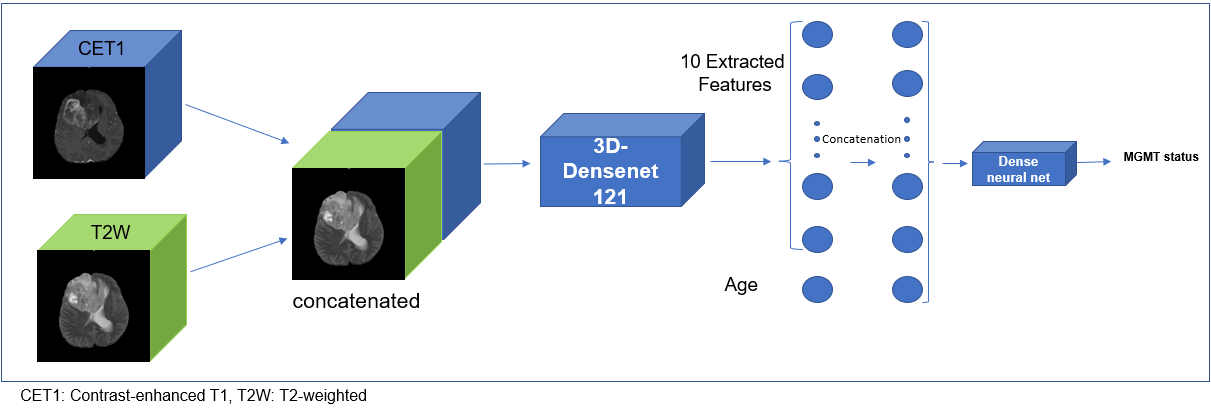

Create List of dictionaries....

We want to experiment with adding age, but that isn't available for this data set. We are going to mock up some fake data for illustration purposes only, by assigning random ages. We therefore don't expect this to positively impact the classification performance.

In [ ]:
train_list=[]
val_list=[]
for i,idx in enumerate(path_list):
    data_dict={}
    id_num=int(idx.split('/')[-1])
    df_selected=df.loc[lambda df: df['BraTS21ID'] == id_num]
    idx_str=idx.split('/')[-1]
    try:
      label=list(df_selected['MGMT_value'])[0]
      data_dict['img_t1']=f'{idx}/{idx_str}_T1w.nii.gz'
      data_dict['img_t2']=f'{idx}/{idx_str}_T2w.nii.gz'
      data_dict['img_t1c']=f'{idx}/T1.nii.gz'
      data_dict['img_flair']=f'{idx}/{idx_str}_FLAIR.nii.gz'
      data_dict['seg']=f'{idx}/segmentation.nii.gz'
      data_dict['age']=torch.randint(low=40, high=90,size=(1,))# Since BraTS2021 dataset doesn't contain age of the patients, here we are generating random age for the patients!
      data_dict['label']=label
    except:
      pass
    if id_num in list(df_train['BraTS21ID']):
        train_list.append(data_dict)
    elif id_num in list(df_val['BraTS21ID']):
        val_list.append(data_dict)
print(f'Number of train samples:{len(train_list)}')
print(f'Number of validation samples:{len(val_list)}')
print(f'Each dictionary would be like:\n{train_list[0]}')

In [ ]:
'''Creating Dataset'''
train_ds = mn.data.Dataset(data=train_list, transform=train_transforms)
val_ds = mn.data.Dataset(data=val_list, transform=val_transforms)

In [ ]:
'''Sampler'''
class_weights=[1,1]
sample_weights=[0]*len(train_ds)
for idx,data in enumerate(train_ds):
    class_weight=class_weights[data['label']]
    sample_weights[idx]=class_weight
sampler= WeightedRandomSampler(sample_weights,num_samples=len(sample_weights),replacement=True)

In [ ]:
"""How make batch in dataloader"""
def collater(data):
    batch_imgs = [s['img'] for s in data]
    batch_labels = [s['label'] for s in data]
    batch_ages=[s['age'] for s in data]
    imgs = torch.stack(batch_imgs, axis=0)
    targets = torch.stack(batch_labels, axis=0)
    ages=torch.stack(batch_ages, axis=0)
    targets=targets.squeeze(-1)
    ages=ages.squeeze(-1)
    return {'imgs': imgs, 'targets': targets, 'ages':ages}

In [ ]:
"""Creating train and validation dataloader"""
train_loader = DataLoader(train_ds, batch_size=bs, num_workers=2, pin_memory=torch.cuda.is_available(),sampler=sampler,collate_fn=collater,prefetch_factor=1)
val_loader = DataLoader(val_ds, batch_size=bs, num_workers=2, pin_memory=torch.cuda.is_available(),collate_fn=collater,prefetch_factor=1)

## TODO: You can experiment with other hyperparameters in the cell below. We've included some suggestions to get you started. 

Again the data is large so during the lab session it is best to keep the epochs low as training will be slow. This will ensure you have time to get through the entire notebook. You can comeback and train for longer later.


In [ ]:
# TODO: Hyperparameter - selection
bs=2
lr=1e-3
epochs=3

## TODO: Experiment with the number of extracted features, the number of layers, neurons or activation function.

In [ ]:
extracted_features=10 #Feel free to change the number of extracted feature
model = mn.networks.nets.DenseNet121(spatial_dims=3, in_channels=2, out_channels=extracted_features).to(device)
intrmd_model=torch.nn.Sequential(
     torch.nn.Linear(extracted_features+1, 5),
     torch.nn.ReLU(),
     torch.nn.Linear(5,2))#Feel free to change the number of layes, neurons , and the activation function
intrmd_model.to(device)
loss_function = torch.nn.CrossEntropyLoss()
params = list(model.parameters()) + list(intrmd_model.parameters())# Creating a list containing the parameters of the first and second neural networks
optimizer = torch.optim.Adam(params, lr)# Simultaneously optimizing both networks.

##Let's check the shape of the extracted brain MRI features and concatenated vector.

In [ ]:
for batch_data in tqdm(train_loader):
        inputs, labels,ages= batch_data["imgs"].to(device), batch_data["targets"].to(device), batch_data['ages'].to(device)
        ages=ages.reshape(2,1)
        optimizer.zero_grad()
        outputs = model(inputs)
        print(f'Shape of the extracted features in a batch:{outputs.shape}')
        print('label:',labels)
        outputs = torch.cat((outputs,ages),dim=1)
        print(f'Shape of the concatenated vector in a batch:{outputs.shape}')
        outputs = intrmd_model(outputs)
        print(f'Shape of the final output in a batch:{outputs.shape}')
        break

## Intermediate fusion training loop

In [ ]:
val_interval = 1
best_metric = -1
best_metric_epoch = -1

for i,epoch in enumerate(tqdm(range(epochs))):
    print("-" * 10)
    print(f"epoch {epoch + 1}/{epochs}")
    model.train()
    epoch_loss = 0
    val_epoch_loss=0
    step = 0
    val_step=0
    for batch_data in tqdm(train_loader):
        step += 1
        inputs, labels,ages= batch_data["imgs"].to(device), batch_data["targets"].to(device), batch_data['ages'].to(device)
        ages=ages.reshape(bs,1)# Makes the dimensions compatible for concatenation.
        optimizer.zero_grad()
        outputs = model(inputs)
        outputs = torch.cat((outputs,ages),dim=1)# Concatenation of the extracted features with age.
        outputs = intrmd_model(outputs)# Feeding the concatenated vector to the second neural network.
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_len = (len(train_ds) // train_loader.batch_size)+1
        print(f"{step}/{epoch_len}, train_loss: {loss.item():.4f}")
    epoch_loss /= step
    print(f"epoch {epoch + 1} average loss: {epoch_loss:.4f}")

    
    model.eval()
    with torch.no_grad():
        y_pred = torch.tensor([], dtype=torch.float32, device=device)
        y = torch.tensor([], dtype=torch.long, device=device)
        for val_data in val_loader:
            val_step +=1
            val_images, val_labels,val_ages = val_data["imgs"].to(device), val_data["targets"].to(device),val_data['ages'].to(device)
            val_ages=val_ages.reshape(bs,1)# Makes the dimensions compatible for concatenation.
            val_output=model(val_images)
            val_output=torch.cat((val_output,val_ages),dim=1)# Concatenation of the extracted features with age.
            val_output=intrmd_model(val_output)# Feeding the concatenated vector to the second neural network.
            val_loss= loss_function(val_output,val_labels)
            val_epoch_loss += val_loss.item()
            val_epoch_len = len(val_ds) // val_loader.batch_size
            total_val_step=(len(val_ds)//bs)+1
            print(f"{val_step}/{total_val_step}, val_loss: {val_loss.item():.4f}")
            y_pred = torch.cat([y_pred, model(val_images)], dim=0)
            y = torch.cat([y, val_labels], dim=0)
            

        val_epoch_loss /= val_step
        print(f"epoch {epoch + 1} average val_loss: {val_epoch_loss:.4f}")

        acc_value_val = torch.eq(y_pred.argmax(dim=1), y)
        acc_metric_val = acc_value_val.sum().item() / len(acc_value_val)
        if acc_metric_val > best_metric:
            best_metric = acc_metric_val
            best_metric_epoch = epoch + 1
            ##torch.save(model.state_dict(), "best_metric_model_classification3d_multimodal_.pth")# Specify Directory
            print("saved new best metric model")
        print(f"current epoch: {epoch + 1} current accuracy: {acc_metric_val:.4f} best accuracy: { best_metric:.4f}")
        print(f"loss: {loss}")
        print(f"\tAccuracy_val: {acc_metric_val}")
        y_pred = torch.tensor([], dtype=torch.float32, device=device)
        y = torch.tensor([], dtype=torch.long, device=device)
        
        step = 0
        train_step=0
        for train_data in train_loader:
            train_step +=1
            train_images, train_labels, train_ages = train_data["imgs"].to(device), train_data["targets"].to(device), train_data['ages'].to(device)
            train_ages=train_ages.reshape(bs,1)# Makes the dimensions compatible for concatenation.
            train_output=model(train_images)
            train_output=torch.cat((train_output,train_ages),dim=1)# Concatenation of the extracted features with age.
            train_output=intrmd_model(train_output)# Feeding the concatenated vector to the second neural network.
            train_epoch_len = len(train_ds) // train_loader.batch_size
            total_train_step=(len(train_ds)//bs)+1
            y_pred = torch.cat([y_pred, model(train_images)], dim=0)
            y = torch.cat([y, train_labels], dim=0)
            

        acc_value_train = torch.eq(y_pred.argmax(dim=1), y)
        acc_metric_train = acc_value_train.sum().item() / len(acc_value_train)
        print('Accuracy_train :', acc_metric_train)

print(f"train completed, best_metric: {best_metric:.4f} at epoch: {best_metric_epoch}")

# 3. Late Fusion: Model ensemble!

## This section has 1 graded TODO item.
### In this section we want to assess the performance of an ensemble of three imaginary models.
In this imaginary scenario we trained the first model using T1W, the second model using T2W, and the third model using T1C.

In the cell below we have mocked up some ground truth labels and classification prediction vectors.

In [44]:
Labels=torch.tensor([1,0,1,0,1,0])# Ground truth
Pred_1=torch.tensor([1,1,1,1,1,0])# A model trained with T1WI 
print(f"T1WI's model accuracy:{torch.eq(Pred_1,Labels).sum()/len(Labels)}")
Pred_2=torch.tensor([0,0,0,0,1,0])# A model trained with T2WI 
print(f"T2WI's model accuracy:{torch.eq(Pred_2,Labels).sum()/len(Labels)}")
Pred_3=torch.tensor([1,0,1,0,0,1])# A model trained with T1C 
print(f"T1C's model accuracy:{torch.eq(Pred_3,Labels).sum()/len(Labels)}")

T1WI's model accuracy:0.6666666865348816
T2WI's model accuracy:0.6666666865348816
T1C's model accuracy:0.6666666865348816


All individual models perform the same.  But what happens when they are combined with the simple majority vote.

In [45]:
'''Late Fusion'''
Pred_aggregated=Pred_1+Pred_2+Pred_3
Pred_aggregated=torch.where(Pred_aggregated>1.5,1,0)# Performing majority voting
print(f'Model ensemble accuracy:{torch.eq(Pred_aggregated,Labels).sum()/len(Labels)}')

Model ensemble accuracy:1.0


## TODO [Graded]: Could the performance of the simple majority vote ever be worse than anyone individual classifier?

Answer in the cell below.

## Some additional questions to think about (These are not graded):
### 1- Pros and Cons of early, intermediate and late fusion?
### 2- In what circumstances should early, intermediate, or late fusion be used?
### 3- Why don't we always do model ensembles and late fusions?

### References:
1. Bellot, D., Boyer, A. and Charpillet, F. (2002) ‘A new definition of qualified gain in a data fusion process: application to telemedicine’, in Proceedings of the Fifth International Conference on Information Fusion. FUSION 2002. (IEEE Cat.No.02EX5997), pp. 865–872 vol.2.
2. Gadzicki, K., Khamsehashari, R. and Zetzsche, C. (2020) ‘Early vs Late Fusion in Multimodal Convolutional Neural Networks’, in 2020 IEEE 23rd International Conference on Information Fusion (FUSION), pp. 1–6.
3. Karpathy, A. et al. (2014) ‘Large-scale video classification with convolutional neural networks’, in Proceedings of the IEEE conference on Computer Vision and Pattern Recognition, pp. 1725–1732.
4. Huang, S.-C. et al. (2020) ‘Fusion of medical imaging and electronic health records using deep learning: a systematic review and implementation guidelines’, npj Digital Medicine. doi:10.1038/s41746-020-00341-z.
5. Haileleol Tibebu (2020), Introduction To Data Fusion, URL: https://medium.com/haileleol-tibebu/data-fusion-78e68e65b2d1
6. Yoo, Y. et al. (2019) ‘Deep learning of brain lesion patterns and user-defined clinical and MRI features for predicting conversion to multiple sclerosis from clinically isolated syndrome’, Computer Methods in Biomechanics and Biomedical Engineering: Imaging & Visualization, 7(3), pp. 250–259.iomed. Eng. Imaging Vis. 7, 250–259, (2019).
7. Boonn, William W., and Curtis P. Langlotz. 2009. “Radiologist Use of and Perceived Need for Patient Data Access.” Journal of Digital Imaging 22 (4): 357–62.
8. Haskins, Grant, Uwe Kruger, and Pingkun Yan. 2020. “Deep Learning in Medical Image Registration: A Survey.” Machine Vision and Applications 31 (1): 8.
9. Huang, Shih-Cheng, Anuj Pareek, Saeed Seyyedi, Imon Banerjee, and Matthew P. Lungren. 2020. “Fusion of Medical Imaging and Electronic Health Records Using Deep Learning: A Systematic Review and Implementation Guidelines.” NPJ Digital Medicine 3 (October): 136.
10. Liu, Shi-Feng, Jian Lu, Hong Wang, Yan Han, De-Feng Wang, Li-Li Yang, Zi-Xiang Li, and Xiao-Kun Hu. 2019. “Computed Tomography-Magnetic Resonance Imaging Fusion-Guided Iodine-125 Seed Implantation for Single Malignant Brain Tumor: Feasibility and Safety.” Journal of Cancer Research and Therapeutics 15 (4): 818–24.
